# Machine Learning Project 1  ( Part 1 )
## UNICAMP

## Dataset 1

Load Datasets


In [102]:
import pandas as pd
import numpy as np

df = pd.read_table("cluster.dat",header=None, sep="\s+")
datos = pd.DataFrame(df)

datos


,0,1
0,1555.0,28.65
1,1490.0,27.55
2,1445.0,28.35
3,1415.0,28.80
4,1375.0,28.05
...,...,...
568,3420.0,27.95
569,3465.0,26.85
570,3525.0,26.00
571,3570.0,26.15


Transformamos el dataset a un array de nummpy

In [103]:
datos=datos.to_numpy()
datos

array([[1555.  ,   28.65],
       [1490.  ,   27.55],
       [1445.  ,   28.35],
       ...,
       [3525.  ,   26.  ],
       [3570.  ,   26.15],
       [3440.  ,   25.6 ]])

Shuffle data

In [104]:
np.random.shuffle(datos)
datos

array([[1610.  ,    3.55],
       [1585.  ,   12.  ],
       [1285.  ,   10.65],
       ...,
       [2040.  ,    5.65],
       [2165.  ,    9.45],
       [1945.  ,   10.55]])

### Split Dataset 
Split data in train and test:
- 90% train 
- 10% test

In [105]:
datos_train = datos[:int(0.9*len(datos))]
datos_test = datos[int(0.9*len(datos)):]

print("Train", datos_train.shape)
print("Test", datos_test.shape)

Train (515, 2)
Test (58, 2)


In [106]:
x_train = datos_train[:,0]
y_train = datos_train[:,1]

### Normalization
Min max Scaler

In [107]:
def normalization(x,y,x_max, x_min , y_max, y_min):
    print("Normalizating using parameters: x", x_max,"\t",x_min)
    print("Normalizating using parameters: y", y_max,"\t",y_min)
    x=(x-x_min)/(x_max-x_min) 
    y=(y-y_min)/(y_max-y_min)
    return x,y

x_max = x_train.max()
x_min = x_train.min()
y_max = y_train.max()
y_min = y_train.min()

In [108]:
x_n_train, y_n_train = normalization(x_train,y_train,x_max,x_min,y_max,y_min)
print("x_train",x_n_train[:3] ,"....")
print("y_train",y_n_train[:3] ,"....")

Normalizating using parameters: x 3635.0 	 335.0
Normalizating using parameters: y 29.15 	 1.95
x_train [0.38636364 0.37878788 0.28787879] ....
y_train [0.05882353 0.36948529 0.31985294] ....


### K-Means Function

In [111]:
import matplotlib.pyplot as plt 
def kmeans(k,x,y):
    
    
    # Find min and max values    
    x_min=np.min(x)
    x_max=np.max(x)
    y_min=np.min(y)
    y_max=np.max(y)

    # print("Min Max X values",x_min,x_max)
    # print("Min Max Y values",y_min,y_max)
    
    # Select K Random Points
    punto_x=np.random.uniform(low=x_min,high=x_max,size=k)
    punto_y=np.random.uniform(low=y_min,high=y_max,size=k)


    # print("puntos X Random",punto_x)
    # print("punto Y Random",punto_y)
    
    old_distortion = np.inf 
    for it in range(20):
        # Se creará una matriz de distancias
        matriz_distancias = np.zeros((len(x),k))
        # print (matrix.shape)

        for k_i in range(k):

            # Cálculo de Distancia Euclideana
            x_h=(x-punto_x[k_i])**2
            y_h=(y-punto_y[k_i])**2
            dist= np.sqrt(x_h+y_h)
            matriz_distancias[:,k_i]=dist

     
    
        # Encontrar la mínima distancia y actualizar la pertenencia en la 
        # matriz máscara
        
        min=np.argmin(matriz_distancias,axis=1)
        matriz_clusters=np.zeros(matriz_distancias.shape)
        i=0
        for min_i in min:
            matriz_clusters[i][min_i]=1
            i+=1
        
        # Transformar en matriz columna para multiplicar
        x_r=x.reshape(-1,1)
        y_r=y.reshape(-1,1)

        # Calcular la suma de los valores clusters
        matriz_clusters_x=x_r*matriz_clusters
        matriz_clusters_y=y_r*matriz_clusters

        total=matriz_clusters.sum(axis=0)

        total_x=matriz_clusters_x.sum(axis=0)
        total_y=matriz_clusters_y.sum(axis=0)

        # Actualizar puntos con la media 
        punto_x=(total_x/total)
        punto_y=(total_y/total)

        # Lista de clusters ( 0, 1 , 2) Para colorear
        clusters = np.argmax(matriz_clusters,axis=1)

        centroides_x = np.matmul(matriz_clusters,punto_x)
        centroides_y = np.matmul(matriz_clusters,punto_y)
        

        distortion = ( ( x - centroides_x )**2 + ( y - centroides_y )**2 ).sum()
        
        


        # Distortion No varía
        if ( abs( old_distortion - distortion ) <= 0.001 ): break
        else: old_distortion = distortion



    
    print ( "\n \n DISTORTION =",distortion, "ITERATION=", it)
    plt.scatter(x,y,marker="o",c=clusters)
    plt.scatter(punto_x,punto_y,marker="*",c="red")
    plt.show()

    return punto_x,punto_y,matriz_clusters,distortion



 
 DISTORTION = 86.8817848038913 ITERATION= 1


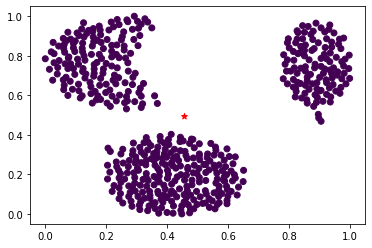


 
 DISTORTION = 45.35079810964143 ITERATION= 3


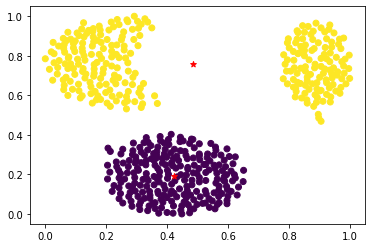


 
 DISTORTION = 11.366068154678093 ITERATION= 2


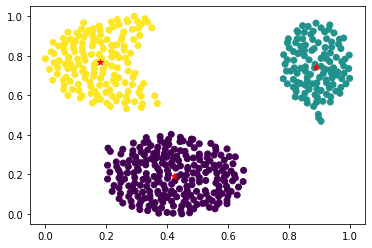


 
 DISTORTION = 10.211219899614532 ITERATION= 7


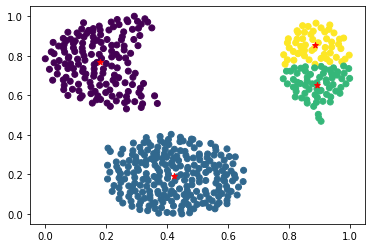


 
 DISTORTION = 7.638512007044511 ITERATION= 5


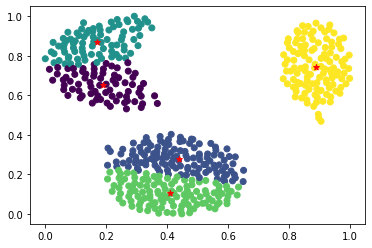


 
 DISTORTION = 6.000708340447322 ITERATION= 7


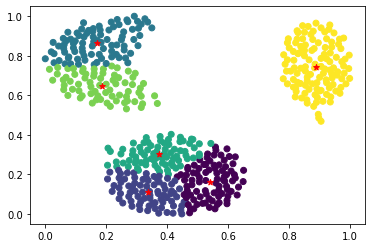


 
 DISTORTION = 5.419679868802213 ITERATION= 12


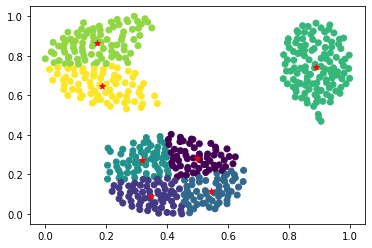

<ipython-input-111-feaf1f772ef8>:62: RuntimeWarning: invalid value encountered in true_divide
  punto_x=(total_x/total)
<ipython-input-111-feaf1f772ef8>:63: RuntimeWarning: invalid value encountered in true_divide
  punto_y=(total_y/total)

 
 DISTORTION = nan ITERATION= 19


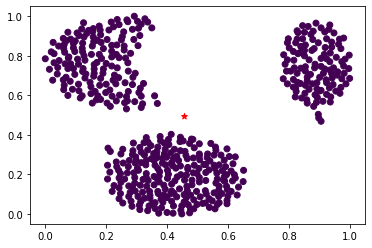


 
 DISTORTION = nan ITERATION= 19


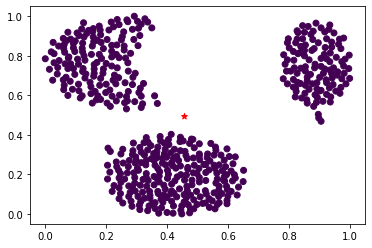


 
 DISTORTION = 3.3735877684590094 ITERATION= 11


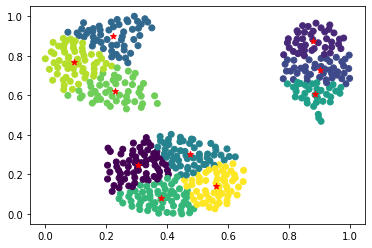

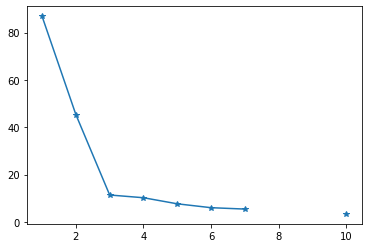

In [115]:
def metodo_codo(k_max ):
    list_distortions = []
    for k in range(1,k_max+1):
        centroide_x , centroide_y , clusters, distortion = kmeans(k,x_n_train,y_n_train)
        list_distortions.append(distortion)
    
    plt.plot(range(1,k_max+1),list_distortions,marker="*")
    plt.show()




metodo_codo(10)